# Linear SVM Classification

## Soft Margin Classification

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris= datasets.load_iris()
X=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)

svm_clf=Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Nonlinear SVM Classification

In [2]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf=Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000)),
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))])

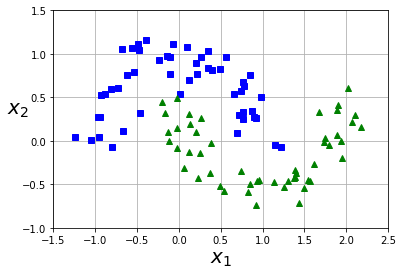

In [3]:
import matplotlib.pyplot as plt
def plot_dataset(X,y, axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
    plt.plot(X[:,0][y==1], X[:,1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5,2.5, -1, 1.5])

In [4]:
def plot_predictions(clf, axes):
    x0s=np.linspace(axes[0], axes[1],100)
    x1s=np.linspace(axes[2], axes[3],100)
    x0, x1=np.meshgrid(x0s, x1s)
    X=np.c_[x0.ravel(), x1.ravel()]
    y_pred=clf.predict(X).reshape(x0.shape)
    y_decision=clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg, alpha=0.1)
    

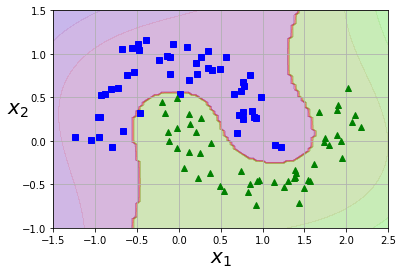

In [5]:
plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

## Polynomial Kernel

In [9]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

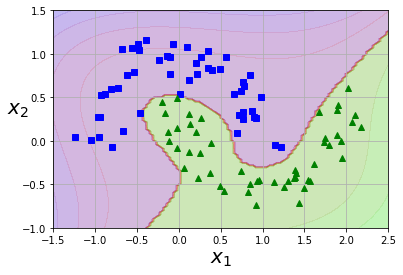

In [10]:
plot_predictions(poly_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

## Gaussian RBF Kernel

In [13]:
rbf_kernel_svm_clf=Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

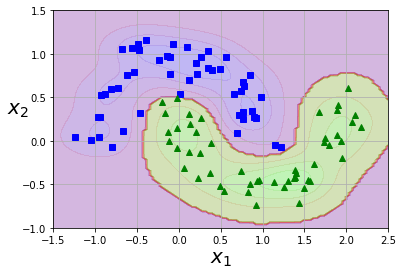

In [14]:
plot_predictions(rbf_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

# SVM Regression

In [15]:
from sklearn.svm import LinearSVR

svm_reg=LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [15]:
from sklearn.svm import SVR

svm_poly_reg=SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

LinearSVR(epsilon=1.5)